# Comparing the result with Shap

Shap is a method developed by Scott Lundberg et al that also tries to estimate Shapley value.  
The estimated Shapley values agree on linear systems. 

In [11]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.layers.core import Activation

import sys
sys.path.append("../")
from IntegratedGradients import *

from shap import KernelExplainer, DenseData, visualize, initjs

Loading data

In [2]:
X = np.array([[float(j) for j in i.rstrip().split(",")[:-1]] for i in open("iris.data").readlines()][:-1])
Y = np.array([0 for i in range(100)] + [1 for i in range(50)])

Training models

In [3]:
model = Sequential([
    Dense(1, input_dim=4),
    #Activation('sigmoid'),
])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [4]:
history = model.fit(X, Y,
          epochs=300, batch_size=10,
          validation_split=0.1, verbose=0)

Predict

In [5]:
predictions = model.predict(X)

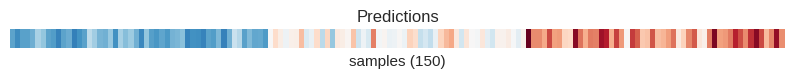

In [6]:
plt.figure(figsize=(10,0.25))

ax = sns.heatmap(np.transpose(predictions), cbar=False)
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel("samples (150)")
plt.title("Predictions")

Explaning with integrated gradients

In [7]:
ig = integrated_gradients(model)

Evaluated output channels (0-based index): All
Building gradient functions
Progress: 100.0%
Done.


In [8]:
exp1 = ig.explain(X[0], steps=10000)

In [9]:
f = lambda x: model.predict(x)[:,0]

In [12]:
# use Shap to explain a single prediction
x = X[0:1,:]
background = DenseData(np.zeros((1,4)), range(4)) 
explainer = KernelExplainer(f, background, nsamples=10000)
exp2=explainer.explain(x).effects

In [13]:
print "Integrated Gradients:", exp1
print "Shap:", exp2

Integrated Gradients: [-0.61425099  0.59199296  0.03849798  0.086778  ]
Shap: [-0.61425097  0.59199297  0.03849797  0.086778  ]
